In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
help(mnist)

Help on Datasets in module tensorflow.contrib.learn.python.learn.datasets.base object:

class Datasets(builtins.tuple)
 |  Datasets(train, validation, test)
 |  
 |  Method resolution order:
 |      Datasets
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new OrderedDict which maps field names to their values.
 |  
 |  _replace(_self, **kwds)
 |      Return a new Datasets object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable, new=<built-in method __new__ of type object at 0x7f832dac3ae0>, len=<built-in function len>) from builtins.type
 |      Make a new Datasets object from a sequence or iterable
 |  
 |  ----------

In [4]:
help(mnist.train)

Help on DataSet in module tensorflow.contrib.learn.python.learn.datasets.mnist object:

class DataSet(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, images, labels, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True)
 |      Construct a DataSet.
 |      one_hot arg is used only if fake_data is true.  `dtype` can be either
 |      `uint8` to leave the input as `[0, 255]`, or `float32` to rescale into
 |      `[0, 1]`.
 |  
 |  next_batch(self, batch_size, fake_data=False, shuffle=True)
 |      Return the next `batch_size` examples from this data set.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  epochs_completed
 |  
 |  images
 |  
 |  labels
 |  
 |  num_examples



In [5]:
help(mnist.train.images)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  the methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any o

In [6]:
mnist.train.images.shape

(55000, 784)

In [39]:
image_batch_1 = mnist.train.images[:50,:]
print(image_batch_1.shape)
mnist_img = np.reshape(mnist.train.images[1,:],(28,28))

(50, 784)


(28, 28)


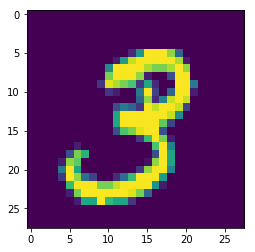

In [17]:
print(mnist_img.shape)
plt.imshow(mnist_img)
plt.show()

In [53]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])
x_image = tf.reshape(x, [-1,28,28,1])  
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
h_conv1 = tf.nn.relu(convolve1)
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2


#Layer 2:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2
h_conv2 = tf.nn.relu(convolve2)
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2

#Fully connected
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs
fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1
h_fc1 = tf.nn.relu(fcl)

keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

fc=tf.matmul(layer_drop, W_fc2) + b_fc2
y_CNN= tf.nn.softmax(fc)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init_op = tf.global_variables_initializer()
with tf.Session() as s:
    s.run(init_op)
    print("Layer 1 sizes")
    r1 = s.run(x_image,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(W_conv1)
    print(r1.shape)
    r1 = s.run(convolve1,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(h_conv1,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(conv1,feed_dict={x:image_batch_1})
    print(r1.shape)
    
    print("Layer 2 sizes")
    r1 = s.run(W_conv2)
    print(r1.shape)
    r1 = s.run(convolve2,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(h_conv2,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(conv2,feed_dict={x:image_batch_1})
    print(r1.shape)
    
    print("Fully connected layer")
    r1 = s.run(layer2_matrix,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(W_fc1,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(fcl,feed_dict={x:image_batch_1})
    print(r1.shape)
    r1 = s.run(h_fc1,feed_dict={x:image_batch_1})
    print(r1.shape)
    

Layer 1 sizes
(50, 28, 28, 1)
(5, 5, 1, 32)
(50, 28, 28, 32)
(50, 28, 28, 32)
(50, 14, 14, 32)
Layer 2 sizes
(5, 5, 32, 64)
(50, 14, 14, 64)
(50, 14, 14, 64)
(50, 7, 7, 64)
Fully connected layer
(50, 3136)
(3136, 1024)
(50, 1024)
(50, 1024)


In [56]:
with tf.Session() as s:
    s.run(init_op)
    for i in range(1100):
        batch = mnist.train.next_batch(50)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
            print("step %d, training accuracy %g"%(i, float(train_accuracy)))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.08
step 100, training accuracy 0.78
step 200, training accuracy 0.88
step 300, training accuracy 0.92
step 400, training accuracy 0.94
step 500, training accuracy 0.94
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 1
step 900, training accuracy 0.96
step 1000, training accuracy 0.98


In [ ]:
mnist_img_28_28_1 = np.reshape(mnist.train.images[1,:],(28,28))

In [34]:
help(tf.nn.conv2d)

Help on function conv2d in module tensorflow.python.ops.gen_nn_ops:

conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)
    Computes a 2-D convolution given 4-D `input` and `filter` tensors.
    
    Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
    and a filter / kernel tensor of shape
    `[filter_height, filter_width, in_channels, out_channels]`, this op
    performs the following:
    
    1. Flattens the filter to a 2-D matrix with shape
       `[filter_height * filter_width * in_channels, output_channels]`.
    2. Extracts image patches from the input tensor to form a *virtual*
       tensor of shape `[batch, out_height, out_width,
       filter_height * filter_width * in_channels]`.
    3. For each patch, right-multiplies the filter matrix and the image patch
       vector.
    
    In detail, with the default NHWC format,
    
        output[b, i, j, k] =
            sum_{di, dj, q} input[b, strides[1] * i + 

In [38]:
batch = mnist.train.next_batch(50)
print(batch[0].shape,batch[1].shape)

(50, 784) (50, 10)
